# Aprendizaje de variedades

## 0. Imports, cargado de datos y selección de características

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding, Isomap, TSNE


file_path = "../datasets/"
file_name = "setX_wdbc.csv"
X_init = pd.read_csv(file_path+file_name, sep = ';', decimal = '.', index_col=0)
file_name = "setY_wdbc.csv"
Y_init = pd.read_csv(file_path+file_name, sep = ';', decimal = '.', index_col=0)
Y_color = Y_init.replace(['M','B'],['r','b']).values.ravel() #<- this is for plotting

#scaler = MinMaxScaler().set_output(transform='pandas')
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(X_init)
X_scl = scaler.transform(X_init)

cols_idx = range(0,30)#[2,4,6,8] #<-- select columns (or just put the names in 'cols' and comment this line)
cols  = X_scl.columns[cols_idx] 
X_sel = X_scl[cols] 

X_sel.shape

(569, 30)

## 1. Locally Linear Embedding (LLE)

In [2]:
n_components = 2
n_neighbors = 15
random_state = 1234
max_iter = 100

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components,
                            max_iter=max_iter, random_state=random_state)
lle.set_output(transform='pandas')
lle.fit(X_sel)
X_lle = lle.transform(X_sel)
col_names = ['LLE%d'%(col+1) for col in range(n_components)]
X_lle.columns=col_names

X_lle.head()

LLE1      LLE2
0 -0.100258 -0.028305
1 -0.046521  0.007148
2 -0.068156 -0.004210
3 -0.070369 -0.044029
4 -0.049459 -0.007021

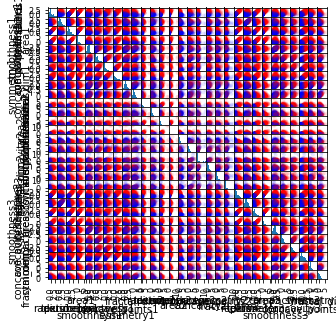

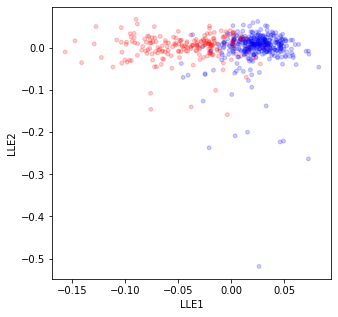

In [3]:
sp_scl = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',
                                    hist_kwds={'bins': 20}, s=60, alpha=.1)
sp_lle = X_lle.plot.scatter(x='LLE1',  y='LLE2',  c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.2)

## 2. Isomap

In [4]:
n_components = 2
n_neighbors = 10
metric = 'cityblock' #<-- 'cityblock', 'cosine', 'euclidean' , 'haversine' , 'l1' , 'l2' , 'manhattan' , 'nan_euclidean' 
max_iter = 500

isom = Isomap(n_neighbors=n_neighbors, n_components=n_components, metric=metric,
              max_iter=max_iter)
isom.set_output(transform='pandas')
isom.fit(X_sel)
X_isom = isom.transform(X_sel)
col_names = ['isomap%d'%(col+1) for col in range(n_components)]
X_isom.columns=col_names

X_isom.head()

isomap1    isomap2
0  69.654842  10.641287
1  30.904974 -19.086006
2  46.339370  -8.044176
3  22.700891  56.511443
4  33.526096  -8.978830

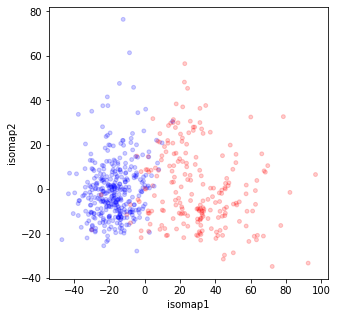

In [5]:
#sp_scl = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',
#                                    hist_kwds={'bins': 20}, s=60, alpha=.1)
sp_iso = X_isom.plot.scatter(x='isomap1',  y='isomap2',  c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.2)

## 3. T-SNE

In [6]:
n_components = 2
perplexity = 50
metric = 'l1' #<-- 'cityblock', 'cosine', 'euclidean' , 'haversine' , 'l1' , 'l2' , 'manhattan' , 'nan_euclidean' 
random_state = 1234
max_iter = 500
n_iter_without_progress=150

tsn = TSNE(perplexity=perplexity, n_components=n_components, metric=metric,
           n_iter = max_iter, n_iter_without_progress=n_iter_without_progress, random_state=random_state)
tsn.set_output(transform='pandas')
X_tsn = tsn.fit_transform(X_sel)
col_names = ['tsne%d'%(col+1) for col in range(n_components)]
X_tsn.columns=col_names

X_tsn.head()

tsne1     tsne2
0  22.619364 -1.704013
1  16.898987 -7.792664
2  20.055101 -3.763979
3  10.356440  3.022393
4  17.677271 -2.621910

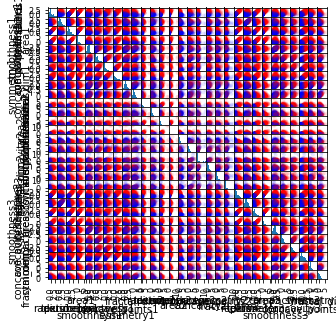

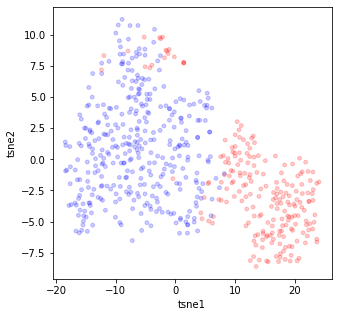

In [7]:
sp_scl = pd.plotting.scatter_matrix(X_sel, c=Y_color, figsize=(5, 5), marker='.',
                                    hist_kwds={'bins': 20}, s=60, alpha=.1)
X_tsn = X_tsn.plot.scatter(x='tsne1',  y='tsne2',  c=Y_color, s=60, figsize=(5, 5), marker='.', alpha=.2)